In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("datah.xlsx")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data = data.rename(columns={'cp':'chest_pain', 'trestbps': 'blood_pressure'})
data

,age,sex,chest_pain,blood_pressure,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.isnull().sum()

age               0
sex               0
chest_pain        0
blood_pressure    0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
ca                0
thal              0
target            0
dtype: int64

## Preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.



In [5]:
data.describe()

,age,sex,chest_pain,blood_pressure,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.mode()

,age,sex,chest_pain,blood_pressure,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,120.0,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools. For example: count plot.

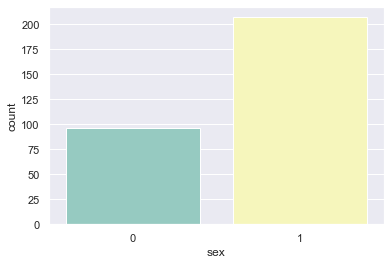

In [7]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="sex", data=data, palette="Set3")

## Counting of Male and Female

,count
sex,
0,96
1,207


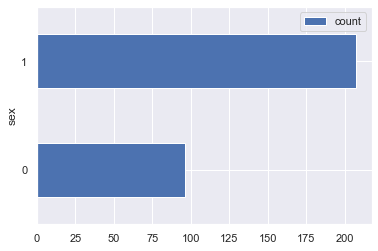

In [8]:
hasts = data.groupby(['sex']).agg(count= ('sex','count'))
hasts.plot(kind='barh')
hasts

## Grouping by "Count of Sex", to Count (ca)"number of major vessels"

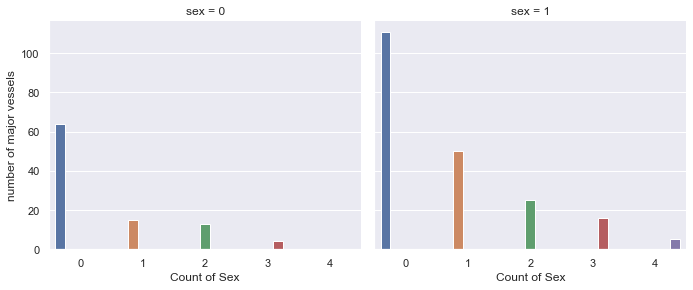

In [9]:

g = sns.catplot(x="ca", hue="ca", col="sex",
                data=data, kind="count",
                height=4, aspect=1.2);
(g.set_axis_labels("Count of Sex", "number of major vessels"))
 

## Grouping by "Count of Sex", to Count (fbs)(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

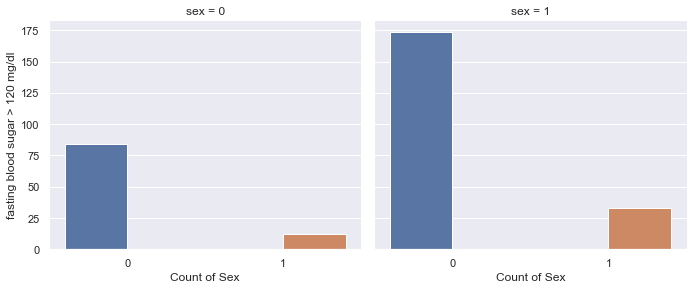

In [10]:
g = sns.catplot(x="fbs", hue="fbs", col="sex",
                data=data, kind="count",
                height=4, aspect=1.2);
(g.set_axis_labels("Count of Sex", "fasting blood sugar > 120 mg/dl"))

,count
sex,
0,96
1,207


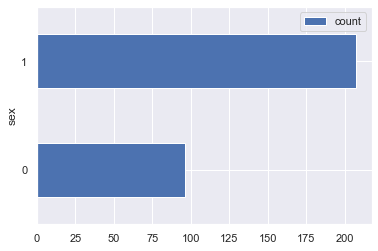

In [11]:
hastb = data.groupby(['sex']).agg(count= ('fbs','count'))
hastb.plot(kind='barh')
hastb

 ## Study the occurrence of CVD across different ages.

,count
sex,
0,96
1,207


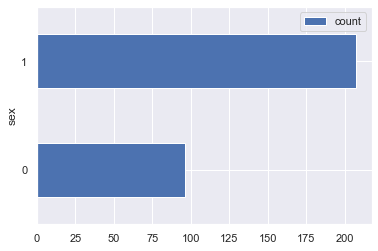

In [12]:
hastt = data.groupby(['sex']).agg(count= ('target','count'))
hastt.plot(kind='barh')
hastt

<AxesSubplot:>

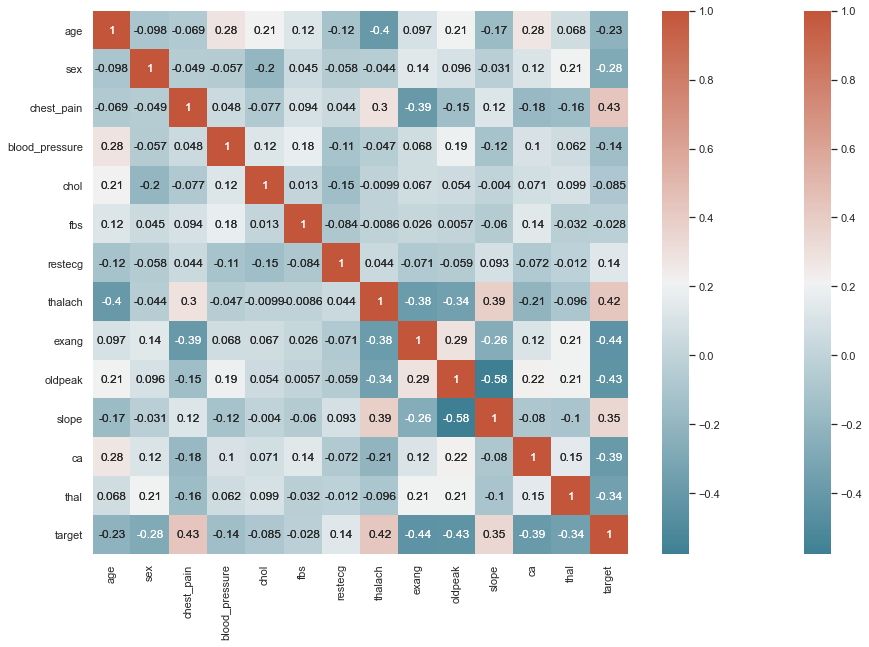

In [13]:
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [14]:
data.columns

Index(['age', 'sex', 'chest_pain', 'blood_pressure', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

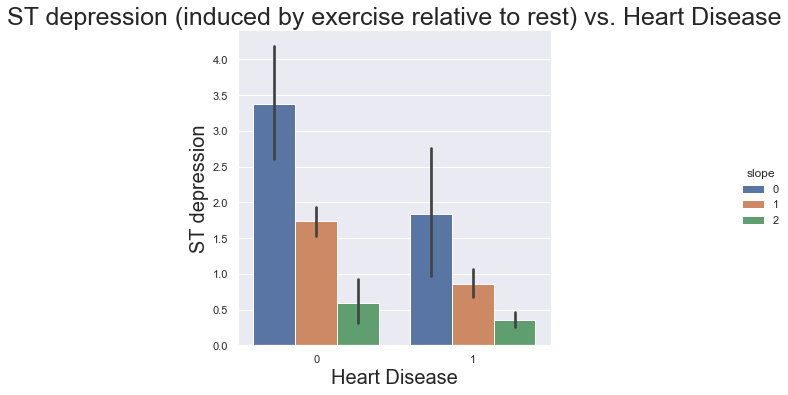

In [15]:
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=data);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20);

## Relationship between peak exercising and occurrence of heart attack?



,count
slope,
0,21
1,140
2,142


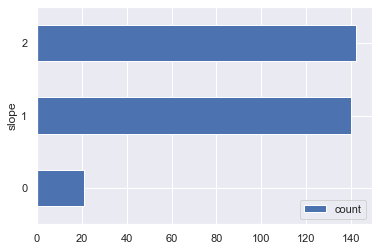

In [87]:
thal= data.groupby(['slope']).agg(count= ('target','count'))
thal.plot(kind='barh')
thal

### Relationship between peak exercising and occurrence of heart attack?
### (Value 0: up sloping , Value 1: flat , Value 2: down sloping )

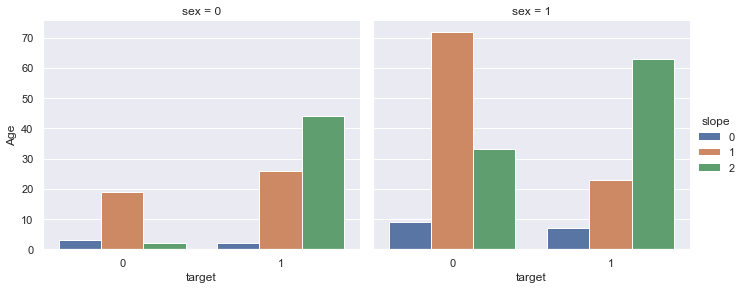

In [91]:
g = sns.catplot(x="target", hue="slope", col="sex",
                data=data, kind="count",
                height=4, aspect=1.2);
(g.set_axis_labels("target", "Age"));

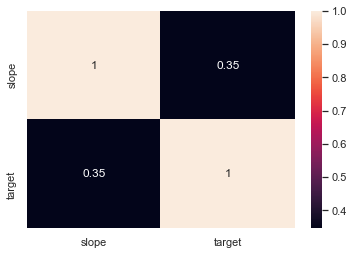

In [94]:
corrMatrix1 = data[["slope", "target"]].corr()
sns.heatmap(corrMatrix1, annot=True)
plt.show()

#### (slope) of the peak exercise ST segment (Ordinal) (Value 0: up sloping , Value 1: flat , Value 2: down sloping )
####  We can be concluded that slope and target has a positive relation of 0.35 .in male and female (Value 2: down sloping is occuring most of the time.)

 ## Is thalassemia a major cause of CVD Answer = No (as it has negatice correlation)

,count
target,
0,138
1,165


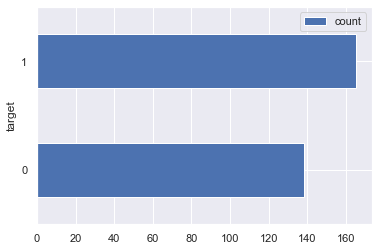

In [83]:
thal= data.groupby(['target']).agg(count= ('thal','count'))
thal.plot(kind='barh')
thal

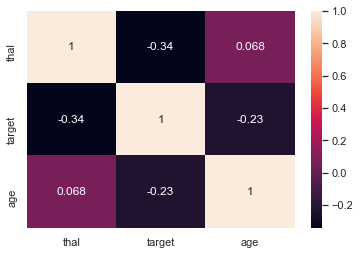

In [81]:
corrMatrix = data[["thal", "target",'age']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

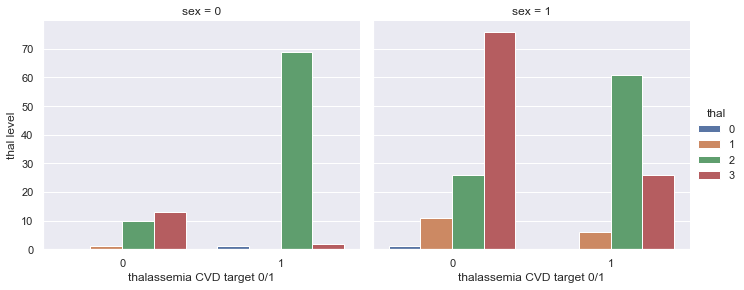

In [73]:
g = sns.catplot(x="target", hue="thal", col="sex",
                data=data, kind="count",
                height=4, aspect=1.2);
(g.set_axis_labels("thalassemia CVD target 0/1", "thal level"))

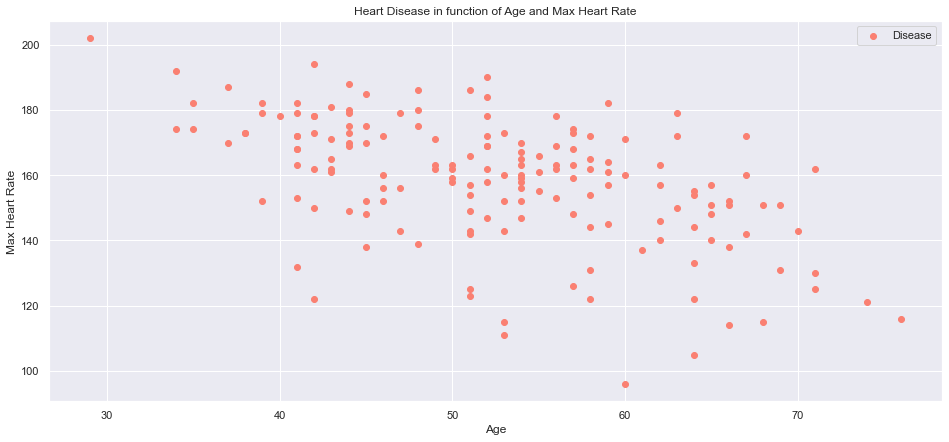

In [16]:
plt.figure(figsize=(16,7))
plt.scatter(data.age[data.target == 1], data.thalach[data.target ==1], c= "salmon")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease"]);

# Correlated variables with target

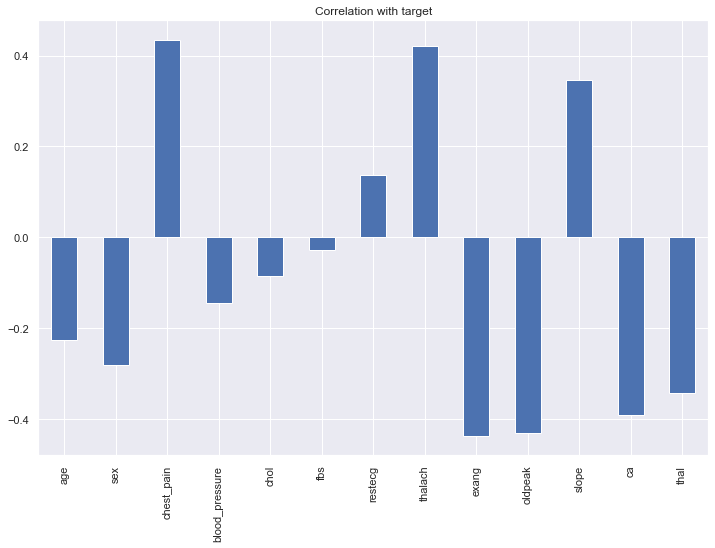

In [17]:
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target");

## Predicting on correlated variables with target

In [18]:
related = data.copy()
related = related.drop(['age', 'sex', 'blood_pressure', 'chol','fbs','exang','oldpeak','ca','thal'],axis = 1)
related

,chest_pain,restecg,thalach,slope,target
0,3,0,150,0,1
1,2,1,187,0,1
2,1,0,172,2,1
3,1,1,178,2,1
4,0,1,163,2,1
...,...,...,...,...,...
298,0,1,123,1,0
299,3,1,132,1,0
300,0,1,141,1,0
301,0,1,115,1,0


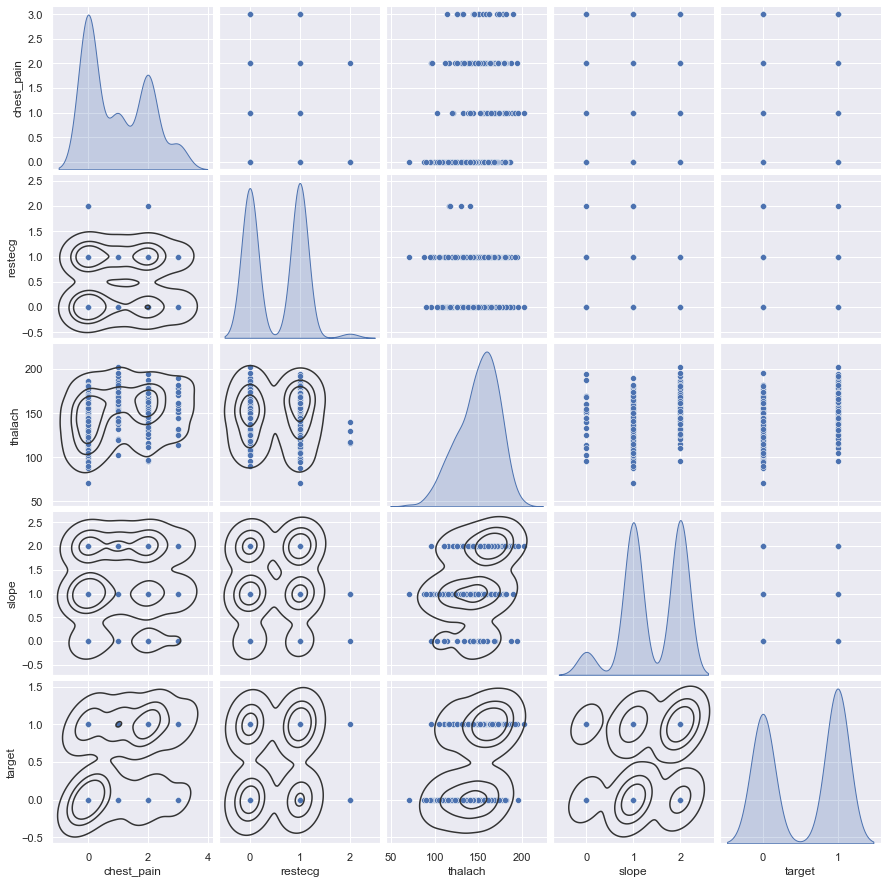

In [57]:
g = sns.pairplot(related, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [19]:
x = related.iloc[:, :-1].values
y = related.iloc[:, -1].values

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


## Model 1: Logistic Regression

In [22]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state = 1)
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68        30
           1       0.69      0.77      0.73        31

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



## Model 2: K-NN (K-Nearest Neighbors)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier()
KN.fit(x_train, y_train)
y_pred1 = KN.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68        30
           1       0.69      0.71      0.70        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



## Model 3: SVM (Support Vector Machine)

In [24]:
from sklearn.svm import SVC
sv = SVC(random_state = 1)
sv.fit(x_train, y_train)
y_pred2 = sv.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70        30
           1       0.71      0.77      0.74        31

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



## Model 4: Naives Bayes Classifier

In [25]:
from sklearn.naive_bayes import GaussianNB
gn = GaussianNB()
gn.fit(x_train, y_train)
y_pred3 = gn.predict(x_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        30
           1       0.68      0.81      0.74        31

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



 ## Model 5: Decision Trees

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred4 = dt.predict(x_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73        30
           1       0.75      0.68      0.71        31

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



## Model 6: Random Forest 

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred5 = rf.predict(x_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70        30
           1       0.71      0.77      0.74        31

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



## Making the Confusion Matrix accuracy_score

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred).round(3)

[[19 11]
 [ 7 24]]


0.705

# Predicting on correlated variables with target

In [29]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 1)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.



## Model 1: Logistic Regression

In [31]:
lg.fit(X_train,Y_train)
y_p1 = lg.predict(X_test)
print(classification_report(Y_test, y_p1))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



## Model 2: K-NN (K-Nearest Neighbors)¶

In [33]:
KN.fit(X_train,Y_train)
y_p2 = KN.predict(X_test)
print(classification_report(Y_test, y_p2))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



## Model 3: SVM (Support Vector Machine)

In [34]:
sv.fit(X_train, Y_train)
y_p3 = sv.predict(X_test)
print(classification_report(Y_test, y_p3))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



## Model 4: Naives Bayes Classifier¶

In [36]:
gn.fit(X_train, Y_train)
y_p4 = gn.predict(X_test)
print(classification_report(Y_test, y_p4))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



## Model 5: Decision Trees

In [49]:
dt.fit(X_train, Y_train)
y_p5 = dt.predict(X_test)
print(classification_report(Y_test, y_p5))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        30
           1       0.74      0.74      0.74        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



## Model 6: Random Forest

In [48]:
rf.fit(X_train, Y_train)
y_p6 = rf.predict(X_test)
print(classification_report(Y_test, y_p6))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.77      0.87      0.82        31

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



## Making the Confusion Matrix accuracy_score

In [50]:
cm2 = confusion_matrix(Y_test, y_p6)
print(cm2)
accuracy_score(Y_test, y_p6).round(3)

[[22  8]
 [ 4 27]]


0.803

## Use a pair plot to understand the relationship between all the given variables.

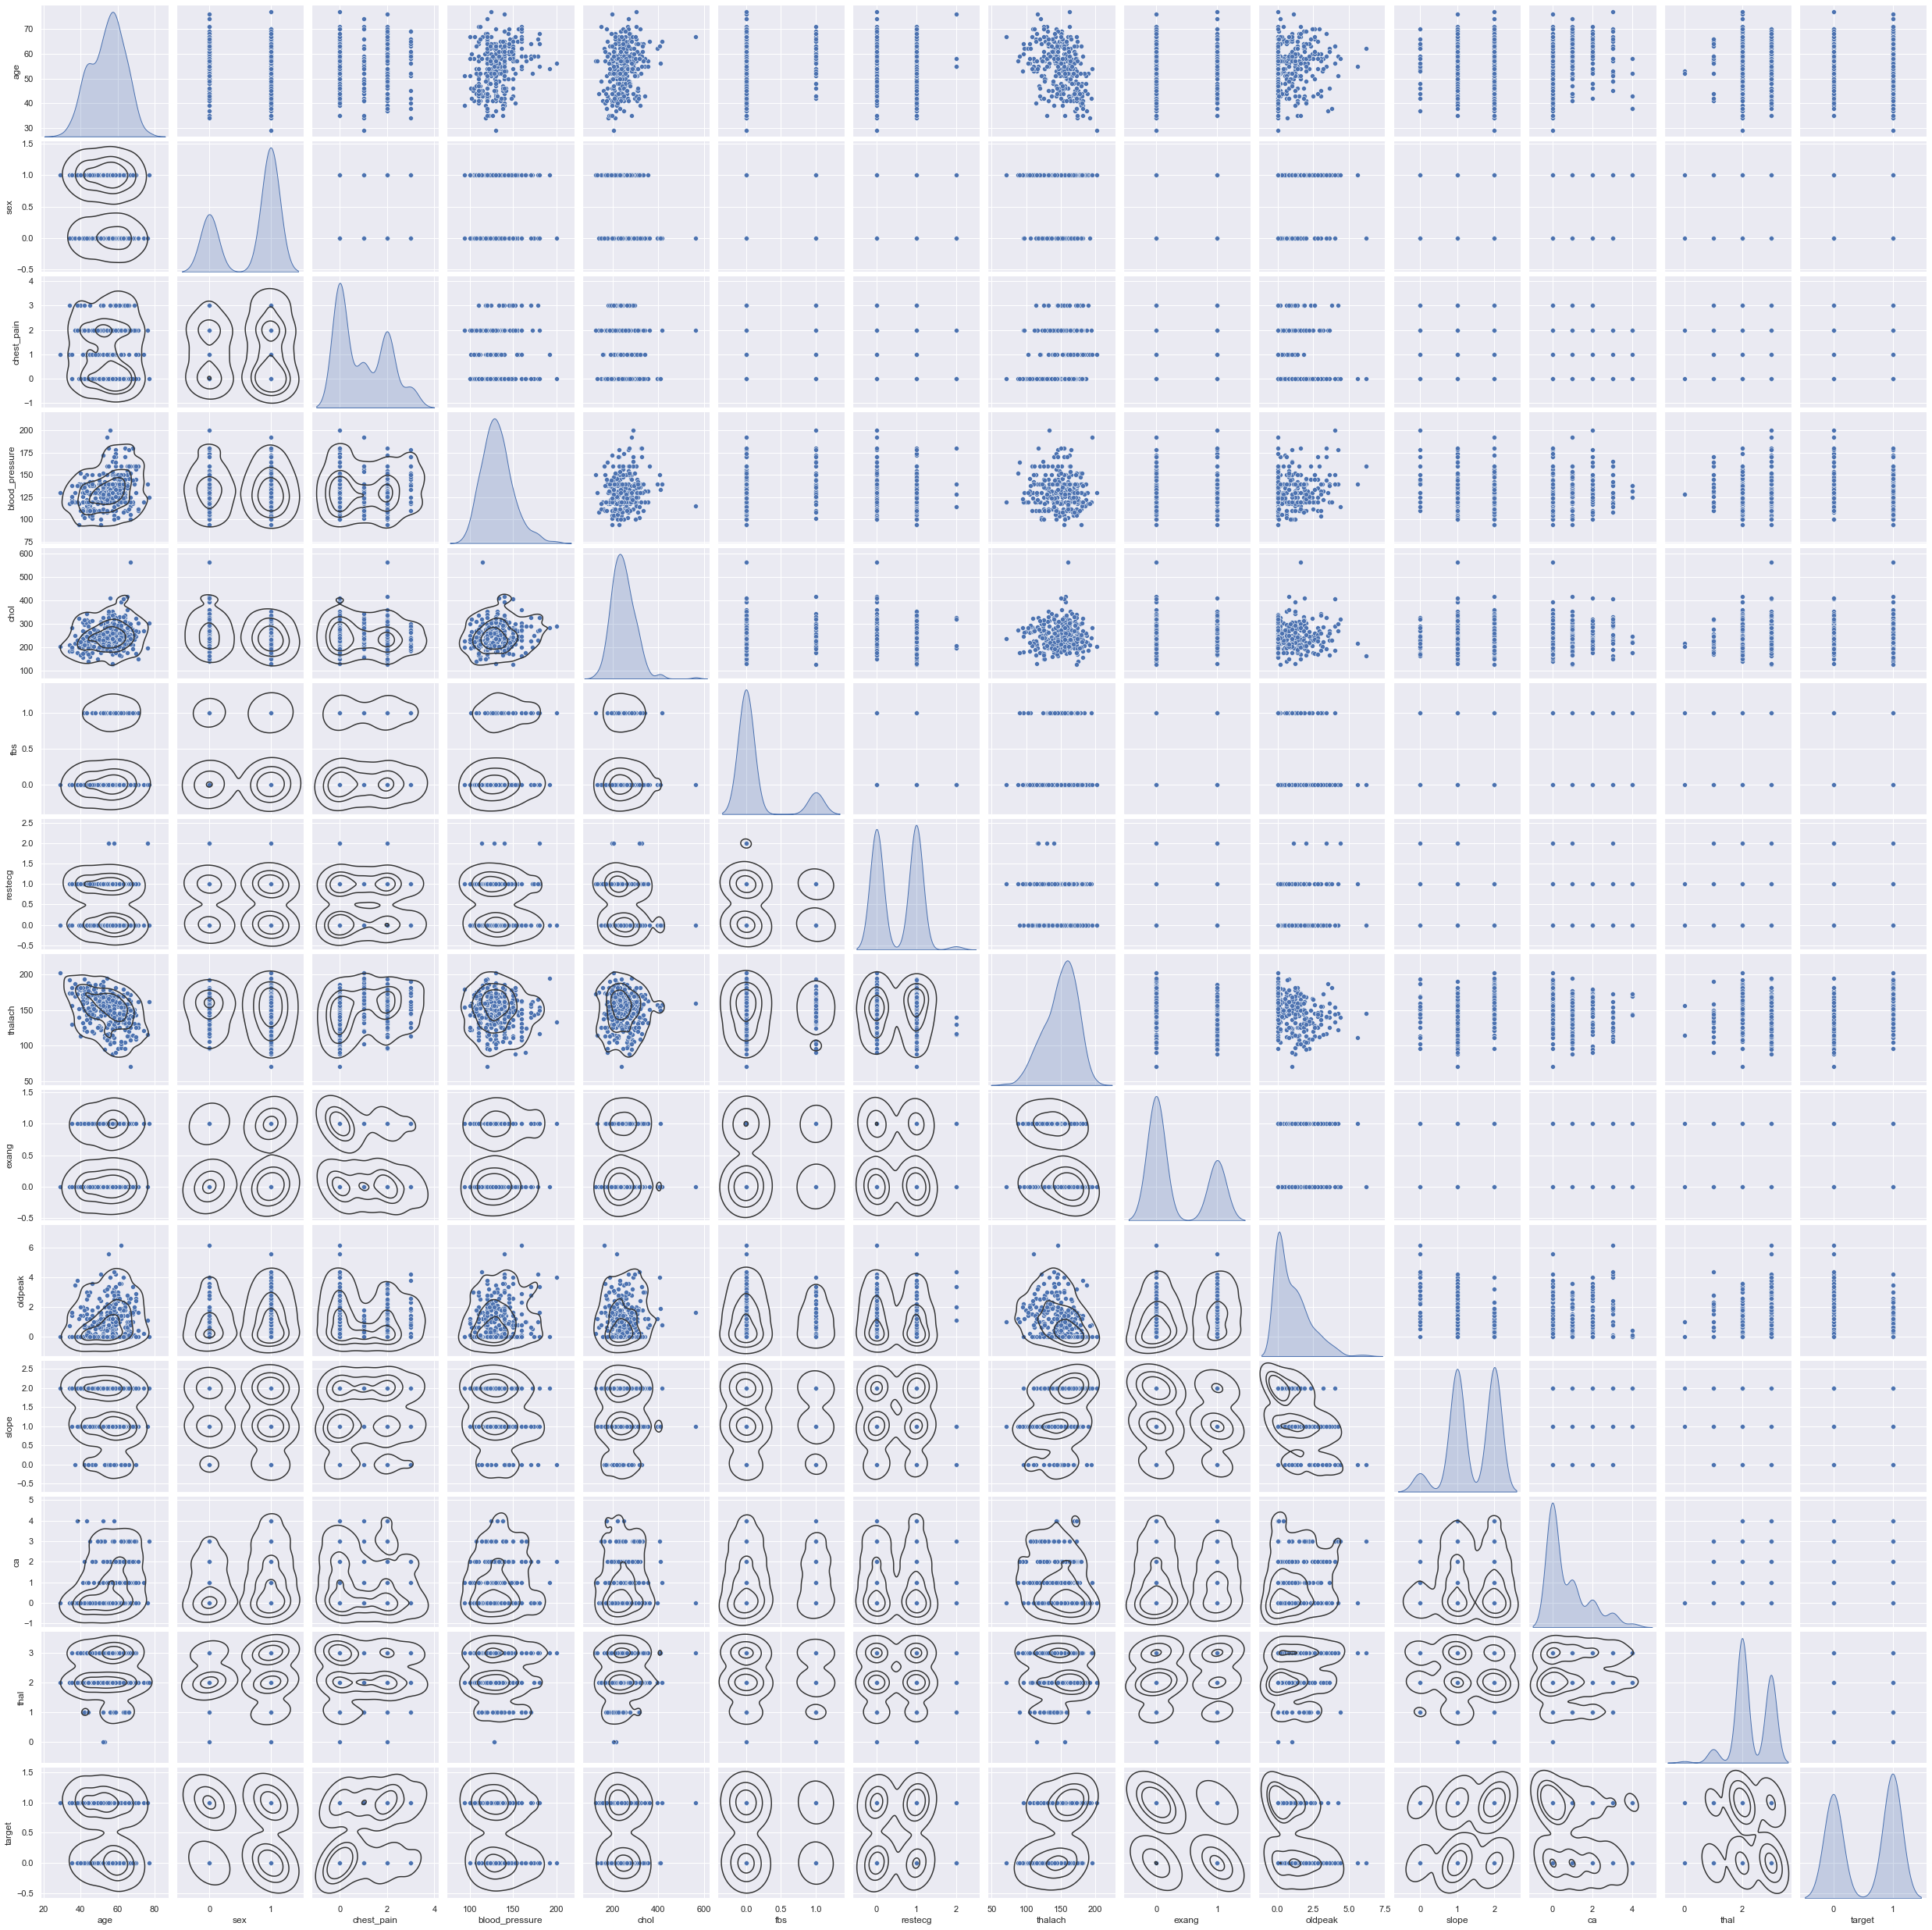

In [58]:
g = sns.pairplot(data, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")